# To implement a neural network without the use of any librabry functions.

### **`Generating the Dataset`**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
np.random.seed(0)

In [2]:
from sklearn import datasets
X,y = datasets.make_moons(200, noise = 0.20)

In [3]:
X

array([[ 0.74346118,  0.46465633],
       [ 1.65755662, -0.63203157],
       [-0.15878875,  0.25584465],
       [-1.088752  , -0.39694315],
       [ 1.768052  , -0.25443213],
       [ 1.95416454, -0.12850579],
       [ 0.93694537,  0.36597075],
       [ 0.88446589, -0.47595401],
       [ 0.80950246,  0.3505231 ],
       [ 1.2278091 , -0.64785108],
       [-0.38454276,  0.50916381],
       [ 0.09252135, -0.31618454],
       [ 1.79531658, -0.32235591],
       [ 1.43861749, -0.15796611],
       [-0.82364866,  0.86822754],
       [ 0.99633397,  0.1731019 ],
       [ 0.66388701,  0.94659669],
       [ 0.13229471, -0.26032619],
       [ 0.2482245 ,  0.7860477 ],
       [-1.00392102,  1.15207238],
       [ 2.08208438,  0.00715606],
       [ 0.87081342, -0.4366643 ],
       [ 0.37268327,  1.01743002],
       [ 1.26735927, -0.11813675],
       [-0.13270154,  1.26653562],
       [ 0.20331   ,  0.19519454],
       [ 1.98373996, -0.11222315],
       [ 1.82749513, -0.03085446],
       [-0.03857867,

In [4]:
y

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

**Ploting the dataset**

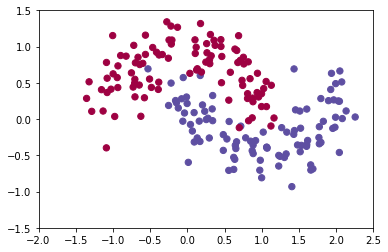

In [3]:
plt.scatter(X[:,0],X[:,1],s = 40,c = y,cmap=plt.cm.Spectral)
plt.xlim((-2.0,2.5))
plt.ylim((-1.5,1.5))
plt.show()

**The dataset we generated has two classes, plotted as red and blue points. You can
think of the blue dots as male patients and the red dots as female patients, with the xand
y- axis being medical measurements.**

## Let's try to fit logistic regression to this dataset.

## **`Logistic Regression`**

In [7]:
# Train The Logistic regression using the Sklearn Logistic regression module.
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV()
clf.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

## **Plot the decision Boundry**

In [3]:
# %% 4 
# Helper function to plot a decision boundary. 
# If you don't fully understand this function don't worry, it just generates the contour plot below. 
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral) 


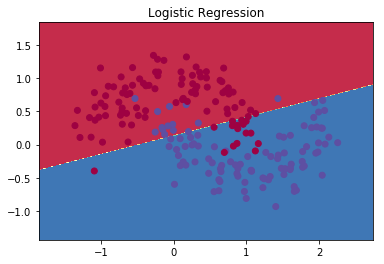

In [8]:

plot_decision_boundary(lambda x: clf.predict(x)) 
plt.title("Logistic Regression") 


## Implementing the Neural Network

(array([[ 0.66759331,  0.19271798,  0.91809195,  0.57968089,  0.45589844],
        [ 0.64235175,  0.25402523,  0.55107915,  0.13190325,  0.20051601]]),
 array([[ 0.51405447,  0.09749338],
        [ 0.8518537 ,  0.39554383],
        [ 0.23307782,  0.58543207],
        [ 0.74683637,  0.60898861],
        [ 0.57901121,  0.17009964]]),
 array([[ 0.68636205,  0.9768018 ,  0.60859331,  0.32837895,  0.80269214],
        [ 0.83636403,  0.41527995,  0.41560826,  0.93661711,  0.72218402]]),
 array([[ 0.03290133,  0.42594595],
        [ 0.09389447,  0.97854755],
        [ 0.57521247,  0.64367809],
        [ 0.36446268,  0.66771489],
        [ 0.57184364,  0.77468348]]))

## A summary of what we need to do :
- We want to set up a NN of (2 input neurons, 1 hidden layer of 5 neurons, 2 output neurans)
- W1 <-- initialized to a random of (2x5)
- W2 <-- initialized to a random of (5x2)
- b1 <-- initialized to a random array of size 1x5
- b2 <-- initialized to a random array of size (1x2)
- X <-- training examples(mx2)
- y <-- lables (mx1)
- we use the tanh activation.
- Steps:
    - **Repeat 1000 times {**
        - Z1 = X*W1 + b1
        - a1 = tanh(Z1)
        - Z2 = a1*W2 + b2
        - a2 = softmax(Z2)
        - loss = -sum(y*log(a2)+(1-y)*log(1-a2))
        - da2 = d(loss)/da2 = (-y/a2 +(1-y)/(1-a2))
        - dZ2 = d(loss)/dZ2 = (d(loss)/da2)*(da2/dZ2) = a2 - y
        - da1 = d(loss)/da1 = (d(loss)/dZ2)*(dZ2/da1) = (a2-y)*W2 = dZ2*W2
        - dZ1 = (d(loss)/da1)*(da1/dZ1) = (a2-y)*W2*(1-tanh(Z2)^2) = da1*d(tanh)
        - dW2 = d(loss)/dW2 = (d(loss)/dZ2)*(dZ2/dW2) = (1/m)*(a2 - y)*(a1)
        - db2 = (1/m)*np.sum(dZ2,axis = 0,keepdim=True)
        - dW1 = d(loss)/dW1 = (d(loss)/dZ1)*(dZ1/dW1) = (1/m)*(a2-y)*W2*tanh'(Z1)*X
        - db1 = (1/m)*np.sum(dZ1,axis = 0,keepdim=True)
        - W2 = W2 - alpha*dW2
        - b2 = b2 - alpha*db2
        - W1 = W1 - alpha*dW1
        - b1 = b1 - alpha*db1
    - **}**

## **`The Method in WILDML`**

In [4]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [ ]:
"""
First let’s implement the loss function we dened
above. We use this to evaluate how
well our model is doing:
"""

In [5]:
# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y]) # same as -np.log(probs[[0:len(X)], y]) , the y is a true and false array that tells which row to include and which to exclude.
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss


# We also implement a helper function to calculate the output of the network. 
# It does forward propagation as defined above and returns the class with the highest probability.

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
"""
Finally, here comes the function to train our Neural Network.
It implements batch gradient descent using the backpropagation derivates we found above.
"""

In [14]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000,epsilon = 0.01,reg_lambda = 0.01, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    effective_loss = []
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        effective_loss.append(calculate_loss(model))
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
     
    return model,np.array(effective_loss)

In [15]:
# This function learns parameters for the neural network and returns the model. Here we use a Mini-batch.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model_in_batch(nn_hdim, num_passes=20000,epsilon = 0.01,reg_lambda = 0.01, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
 
    # This is what we return at the end
    model = {}
    i = 0
    t = 8
    k = 0
    batch_size = 8
    effective_loss = []
    # Gradient descent. For each batch...
    for k in range(num_passes):
        #print(i,' ',t)
        # Forward propagation
        z1 = X[i:t,:].dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        y_ = y[i:t]
        delta3[range(batch_size), y_] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X[i:t,:].T, delta2)
        db1 = np.sum(delta2, axis=0)
 
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
 
        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        effective_loss.append(calculate_loss(model))
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
        i += batch_size
        i %=200
        t = i + batch_size
        
     
    return model,np.array(effective_loss)

In [8]:
y[8:16].shape

(8,)

In [9]:
X.shape

(200, 2)

## A network with a hidden layer of size 3

Loss after iteration 0: 0.432375
Loss after iteration 1000: 0.068692
Loss after iteration 2000: 0.071633
Loss after iteration 3000: 0.071660
Loss after iteration 4000: 0.071739
Loss after iteration 5000: 0.071832
Loss after iteration 6000: 0.071924
Loss after iteration 7000: 0.072011
Loss after iteration 8000: 0.072092
Loss after iteration 9000: 0.072168
Loss after iteration 10000: 0.072239
Loss after iteration 11000: 0.072305
Loss after iteration 12000: 0.072368
Loss after iteration 13000: 0.072428
Loss after iteration 14000: 0.072484
Loss after iteration 15000: 0.072538
Loss after iteration 16000: 0.072589
Loss after iteration 17000: 0.072637
Loss after iteration 18000: 0.072684
Loss after iteration 19000: 0.072728
The tiem taken is : 9.538089752197266


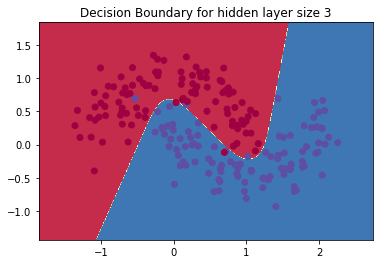

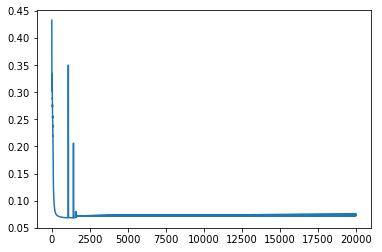

In [26]:
# Build a model with a 3-dimensional hidden layer
import time
start = time.time()
model,loss_ = build_model(3, reg_lambda = 0,print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.figure()
plt.plot(np.arange(20000),loss_)
print('The tiem taken is :',time.time()-start)

## Varying the Learning rate

/home/saquib/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


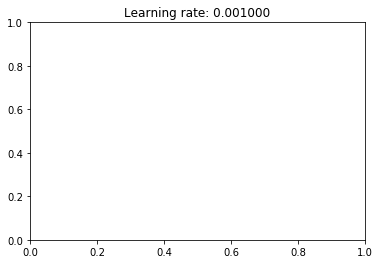

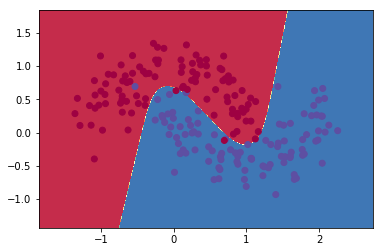

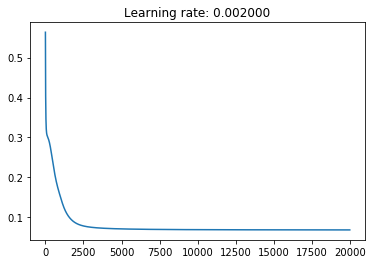

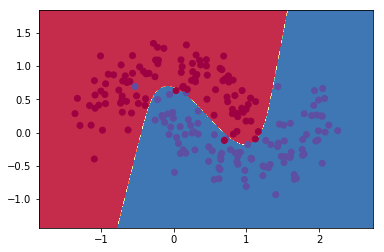

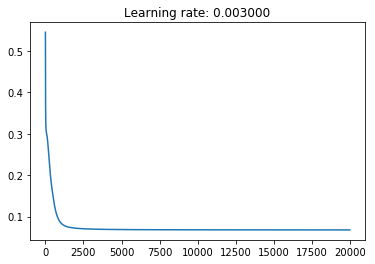

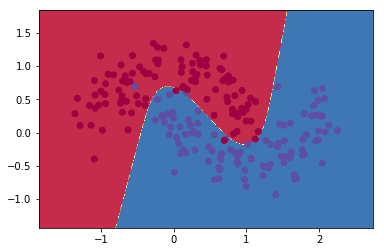

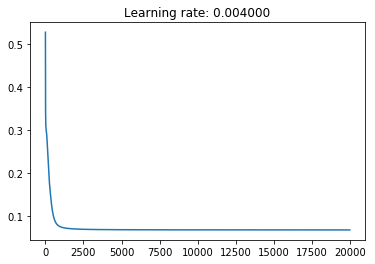

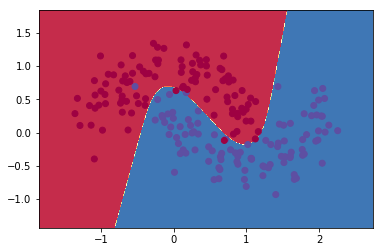

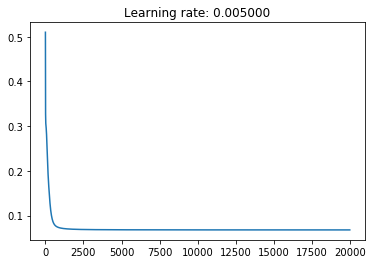

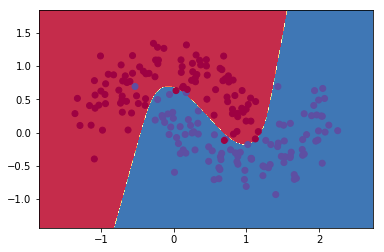

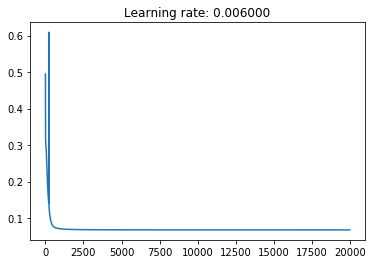

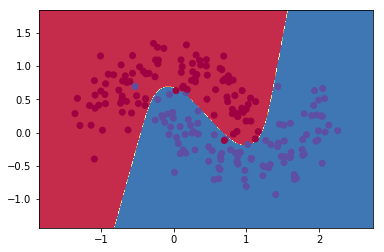

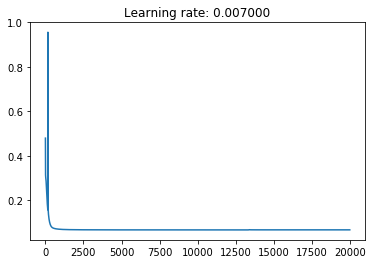

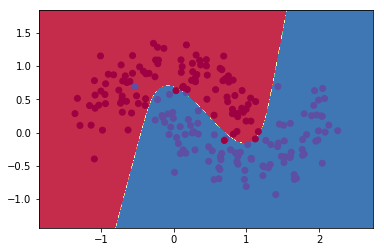

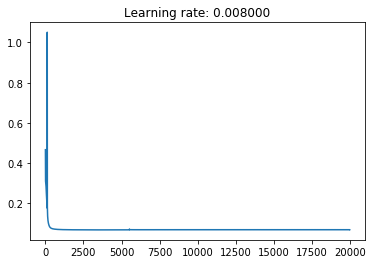

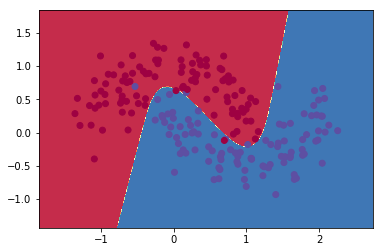

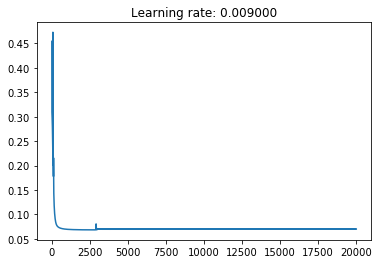

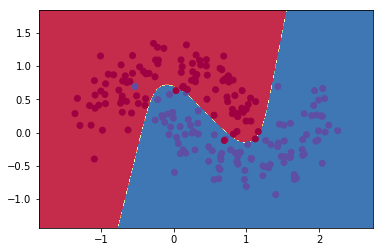

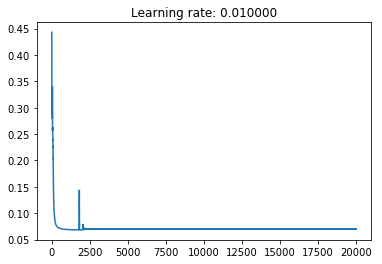

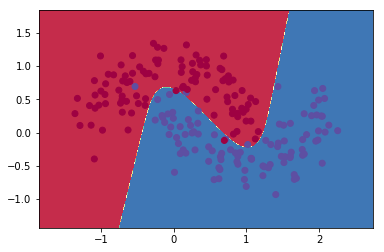

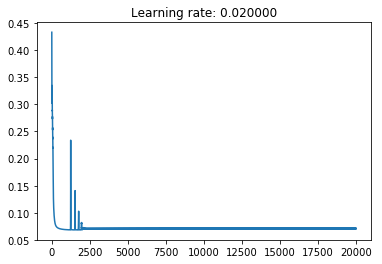

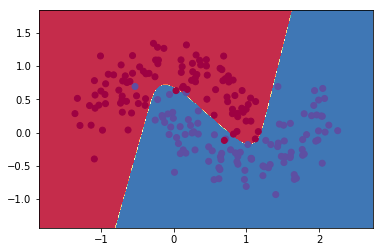

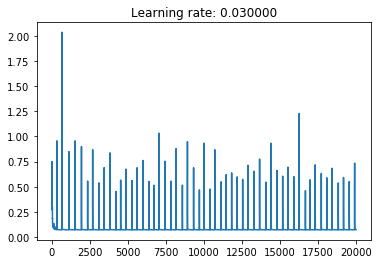

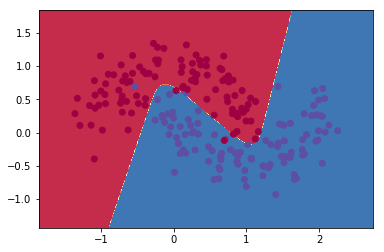

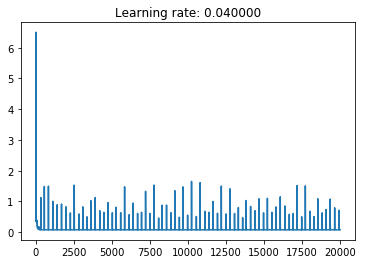

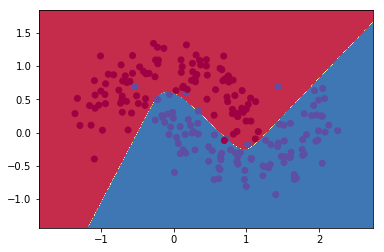

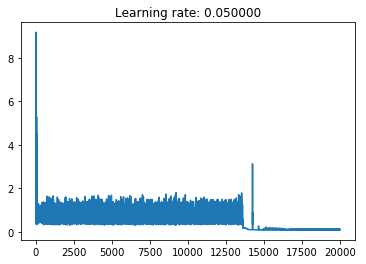

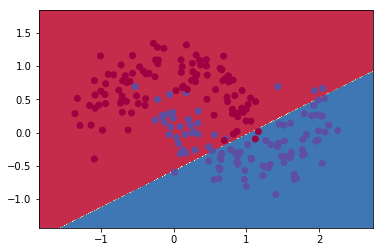

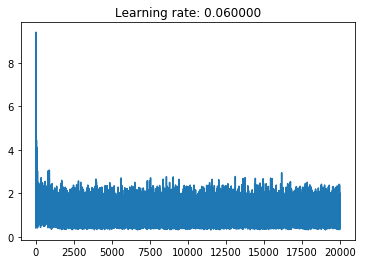

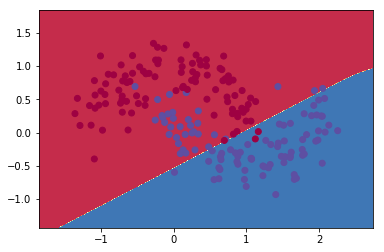

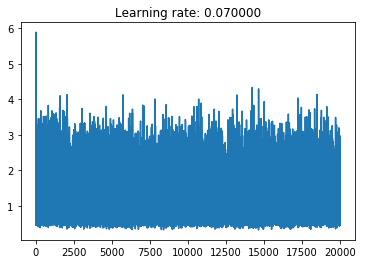

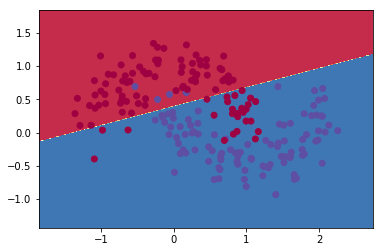

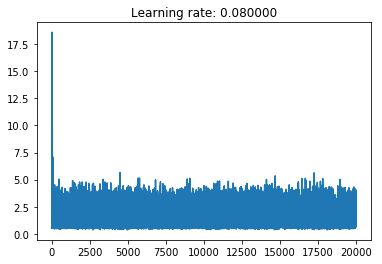

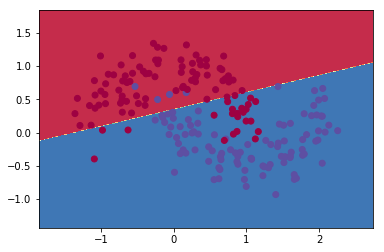

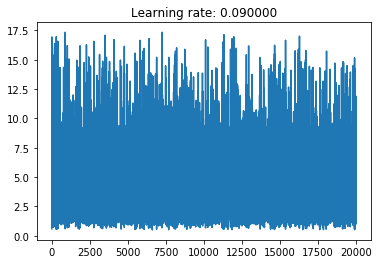

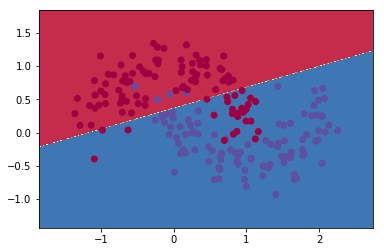

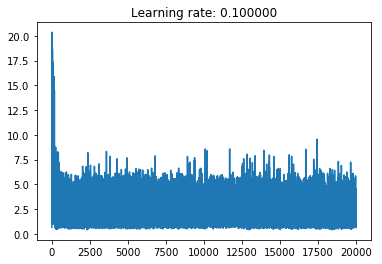

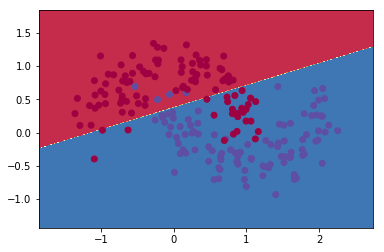

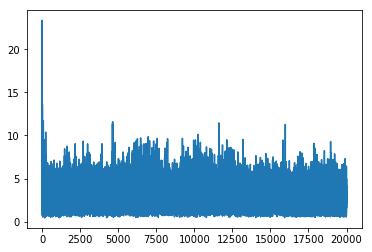

In [49]:
# Batch gradient descent
epsilon_test = [0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
for i, nn_hdim in enumerate(epsilon_test):
    plt.title('Learning rate: %f' % nn_hdim)
    plt.figure()
    model,loss_ = build_model(3,epsilon = nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
    plt.figure()
    plt.plot(np.arange(20000),loss_)
plt.show()

# so by this we found that the best lr = 0.02

The tiem taken by Mini-batch is : 6.5261523723602295


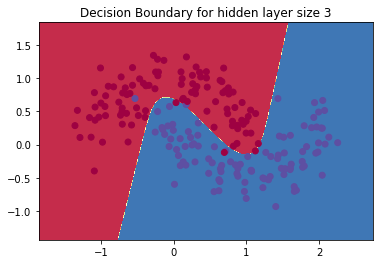

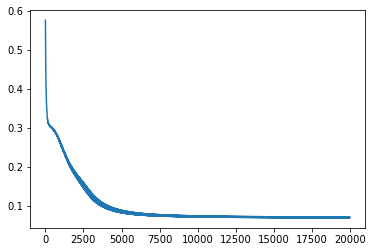

In [18]:
# Build a model with a 3-dimensional hidden layer
import time
start = time.time()
model,loss_ = build_model_in_batch(3,reg_lambda = 0, print_loss=False)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.figure()
plt.plot(np.arange(20000),loss_)
print('The tiem taken by Mini-batch is :',time.time()-start)

## Varying the hidden layer size

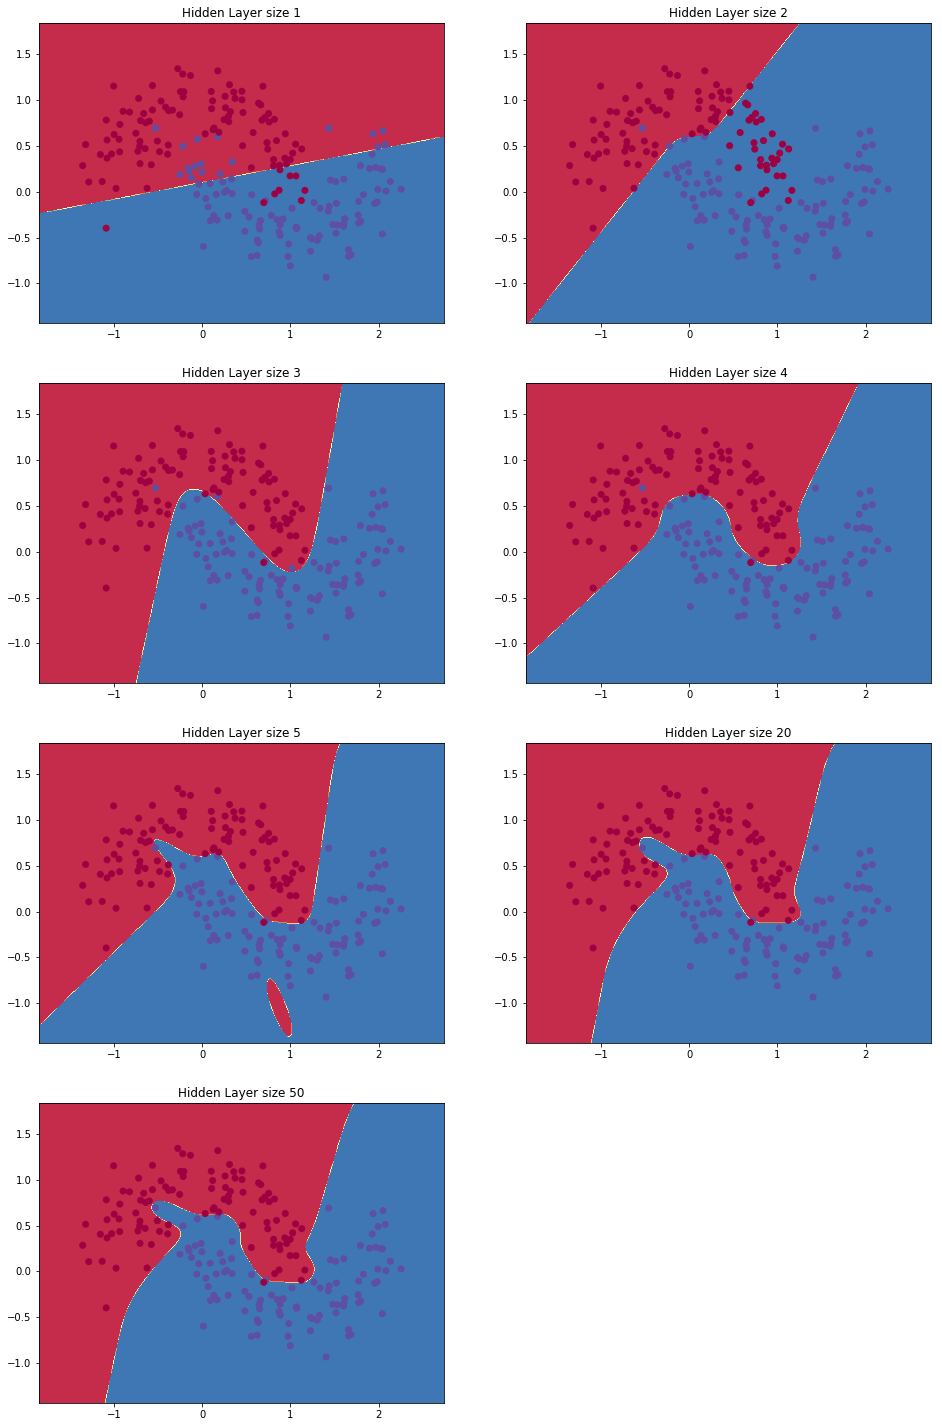

In [13]:
# Batch gradient descent
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

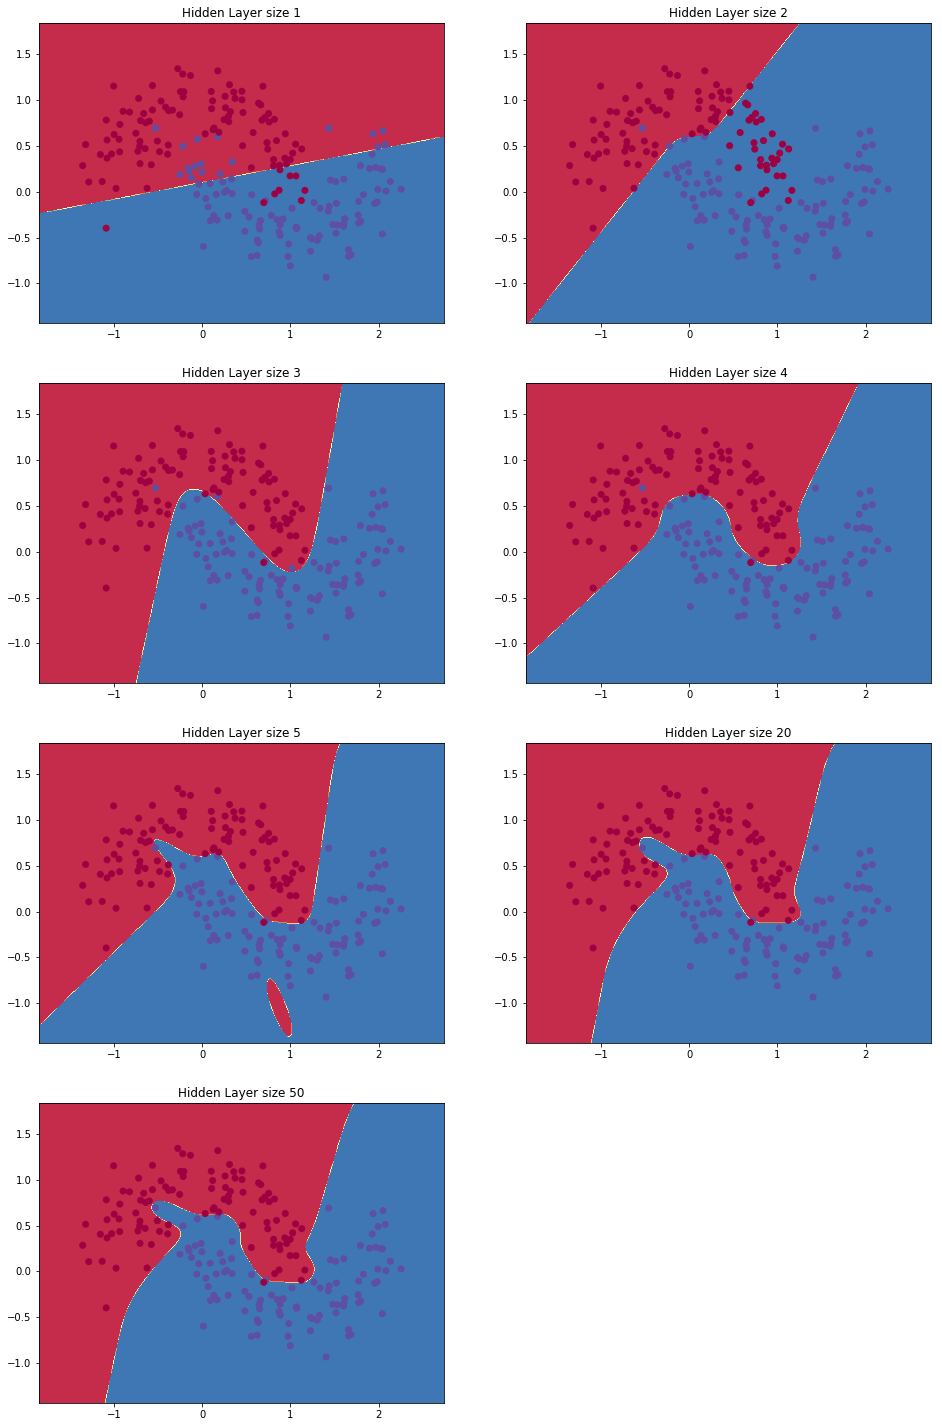

In [34]:
# Mini-batch gradient descent
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

## Now we start to implement different optimizers.

- **Momentum**

In [27]:
# The momentum parameter 
beta1 = 0.9

In [36]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model_with_momentum(nn_hdim, num_passes=20000,epsilon = 0.01,reg_lambda = 0.01, print_loss=False):
     
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    Vw1 = np.zeros((nn_input_dim, nn_hdim))
    Vw2 = np.zeros((nn_hdim, nn_output_dim))
    Vb1 = np.zeros((1, nn_hdim))
    Vb2 = np.zeros((1, nn_output_dim))
    # This is what we return at the end
    model = {}
    effective_loss = []
    # Gradient descent. For each batch...
    for i in range(0, num_passes):
 
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        Vw1 = beta1*Vw1 + (1-beta1)*dW1
        Vw2 = beta1*Vw2 + (1-beta1)*dW2
        Vb1 = beta1*Vb1 + (1-beta1)*db1
        Vb2 = beta1*Vb2 + (1-beta1)*db2
        # Gradient descent parameter update
        W1 += -epsilon * Vw1
        b1 += -epsilon * Vb1
        W2 += -epsilon * Vw2
        b2 += -epsilon * Vb2
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        effective_loss.append(calculate_loss(model))
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
     
    return model,np.array(effective_loss)

Loss after iteration 0: 0.432375
Loss after iteration 1000: 0.388781
Loss after iteration 2000: 0.606075
Loss after iteration 3000: 0.599010
Loss after iteration 4000: 0.596157
Loss after iteration 5000: 0.597682
Loss after iteration 6000: 0.598818
Loss after iteration 7000: 0.599723
Loss after iteration 8000: 0.600474
Loss after iteration 9000: 0.601116
Loss after iteration 10000: 0.601675
Loss after iteration 11000: 0.602171
Loss after iteration 12000: 0.602617
Loss after iteration 13000: 0.603021
Loss after iteration 14000: 0.603390
Loss after iteration 15000: 0.603731
Loss after iteration 16000: 0.604046
Loss after iteration 17000: 0.604340
Loss after iteration 18000: 0.604616
Loss after iteration 19000: 0.604875
The tiem taken by Mini-batch is : 9.460232019424438


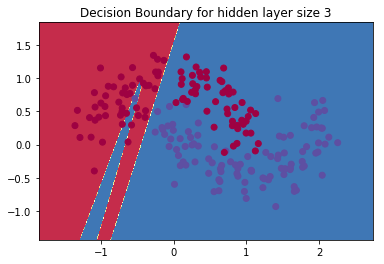

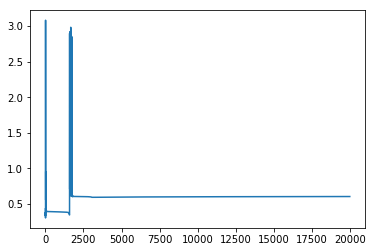

In [37]:
start = time.time()
model,loss_ = build_model_with_momentum(3,reg_lambda = 0, print_loss=True)
 
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")
plt.figure()
plt.plot(np.arange(20000),loss_)
print('The tiem taken by Mini-batch is :',time.time()-start)